# Modul 2 Persamaan Diferensial Numerik

## Metode Euler

Metode Euler metode paling dasar dalam mencari solusi dari permasalahan nilai awal dari suatu PD. Metode ini dikembangkan dari Teorema Taylor:

$$
y\left(t_{i+1}\right)=y\left(t_i\right)+\left(t_{i+1}-t_I\right) y^{\prime}\left(t_i\right)+\cdots
$$

Misalkan kita mempunyai suatu persamaan diferensial dengan nilai awal:

$$y^{\prime}=f(t, y), a \leq t \leq b$$
$$y(a)=\alpha$$


maka solusi secara numeriknya adalah $w_i= y(t_i)$, dengan:

$$w_1=\alpha$$
$$w_{i+1}=w_i+h f\left(t_i, w_i\right), \quad i=1,2, \ldots, N$$

dengan $N+1\in \mathbb{N}$ menyatakan banyaknya titik nantinya.

Solusi kita akan berupa titik yang nantinya dapat menggunakan interpolasi untuk nilai yang tidak dimuat di $w_i$

Metode Euler juga bisa ditulis:

$$w_1=\alpha$$

diikuti iterasi untuk $i=1,2, \ldots, N$,

$$m_1 = f\left(t_i, w_i\right)$$
$$w_{i+1}=w_i+h m_1$$

Algoritma untuk metode Euler adalah sebagai berikut:

In [3]:
function [t, w] = euler(f, a, b, N, alpha)
  h = (b - a) / N;
  t = zeros(N + 1, 1);
  w = zeros(N + 1, 1);
  t(1) = a;
  w(1) = alpha;
  for i = 1 : N
    t(i + 1) = t(i) + h;
    m1 = f(t(i), w(i));
    w(i + 1) = w(i) + h * m1;
  endfor
endfunction

Di sini, inputnya adalah:

- $f(t,y)$ merupakan fungsi dalam bentuk PDB orde 1 $y' = f(t,y)$
- a dan b berturut-turut batas bawah dan batas atas dari $t$
- $N$ merupakan pembagi untuk step size, di mana $N+1$ yang digunakan sebagai banyaknya titik, dan
- alpha merupakan nilai awal

Sekarang akan kita coba gunakan untuk menyelesaikan suatu MNA (masalah nilai awal) PDB orde 1. Misal diberikan MNA sebagai berikut:

$$y^{\prime}=y-t^2+1$$
$$0 \leq t \leq 2$$
$$y(0)=0.5$$

maka kita dapat mendefinisikan

- `f = @(t, y) y-t^2+1`,
- a=0,
- b=2, dan
- alpha $=0.5$

(@ disini menyatakan fungsi anonim yang cara kerjanya mirip dengan fungsi lambda pada Python), sehingga untuk $N=10$, diperoleh kode sebagai berikut:

In [4]:
f = @(t, y) (y-t^2 + 1);
a = 0;
b = 2;
N = 10;
alpha= 0.5;
[t_euler, w_euler] = euler(f, a, b, N, alpha);

In [5]:
[t_euler, w_euler]

ans =

        0   0.5000
   0.2000   0.8000
   0.4000   1.1520
   0.6000   1.5504
   0.8000   1.9885
   1.0000   2.4582
   1.2000   2.9498
   1.4000   3.4518
   1.6000   3.9501
   1.8000   4.4282
   2.0000   4.8658



Untuk visualisasinya, kita akan membuat plot dari hasil yang kita peroleh. Sebagai referensi, solusi eksak dari MNA tersebut adalah

$$y(t)=(t+1)^2- 0.5 e^t$$

Kita tambahkan kode berikut pada file:


    fplot at line 180 column 5

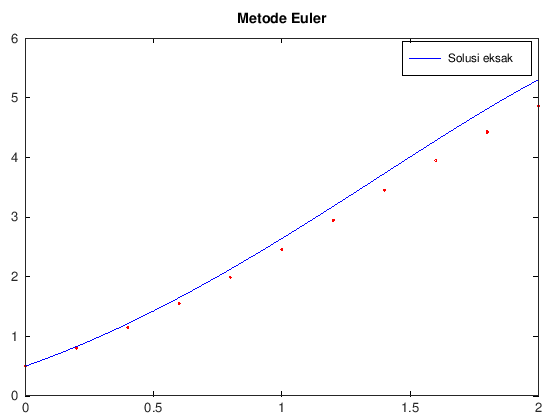

In [6]:
sln = @(t) (t + 1)^2 - 0.5 * exp(t);
fplot(sln, [0, 2], 'b');
hold on;
scatter(t_euler, w_euler, 'r');
legend('Solusi eksak', 'Metode Euler');
title("Metode Euler");

Saat dijalankan, akan muncul jendela pop-up yang berisi plot yang telah dibuat.

![](./pdnum2_Picture1.png)

Penjelasan:

* sln berisi fungsi referensi kita untuk di-plot dan dibandingkan.
* fplot(f, [a, b]) akan menampilkan plot dari suatu fungsi f dengan domain [a, b]. Argumen tambahan ‘b’ memberi warna biru pada plot.
* hold on akan menahan plot yang ada agar kita bisa menampilkan banyak plot sekaligus.
* scatter(x, y) akan menampilkan x-y scatter plot.
* legend memberi legenda/keterangan pada plot yang telah dibuat. Legenda tersebut dimasukkan berurutan mulai dari plot yang didefinsikan terlebih dahulu
* title memberi judul pada plot

## Metode Taylor orde $n$

$$w_0 = \alpha$$

\begin{align*}
T^{(n)} \left(t_i, w_i\right) &= f\left(t_i, w_i\right) + \frac{h}{2}f'\left(t_i, w_i\right) + \cdots + \frac{h^{n-1}}{n!} f^{\left(n-1\right)} \left(t_i,w_i\right) \\
&= \sum_{j=1}^{n} \frac{h^{j-1}}{j!} f^{\left(j-1\right)} \left(t_i,w_i\right) \\
&= f\left(t_i,w_i\right) + \sum_{j=2}^{n} \frac{h^{j-1}}{j!} f^{\left(j-1\right)} \left(t_i,w_i\right)
\end{align*}

$$w_{i+1} = w_i + hT^{(n)} \left(t_i, w_i\right) $$

In [14]:
function [t, w] = taylor(f, fp, a, b, N, alpha)
  h = (b - a) / N;
  n = length(fp) + 1;
  t = zeros(n + 1, 1);
  w = zeros(n + 1, 1);
  t(1) = a;
  w(1) = alpha;
  for i = 1 : N
    t(i + 1) = t(i) + h;
    
    T = f(t(i), w(i));
    for j = 2 : n
      T += h^(j-1) * fp{j-1}(t(i),w(i)) / factorial(j);
    endfor
    
    w(i + 1) = w(i) + h * T;
  endfor
endfunction

Contoh penggunaan:

Misalkan diberikan MNA sebagai berikut:

$$y' = y - t^2 + 1$$
$$0 \le t \le 2$$
$$y(0) = 0.5$$

In [15]:
% contoh pakai: subbab 5.3 example 1b (orde 4)

% f(t_i, w_i)
f0 = @(t,y) y - t^2 + 1;

% f'(t_i, w_i)
f1 = @(t,y) y - t^2 + 1 - 2*t;

% f''(t_i, w_i)
f2 = @(t,y) y - t^2 - 2*t - 1;

% f'''(t_i, w_i)
f3 = @(t,y) y - t^2 - 2*t - 1;

% hitung pada interval [0,2], N=10, y(0)=alpha=0.5
[t, w] = taylor(f0, {f1, f2, f3}, 0, 2, 10, 0.5);
% otomatis Taylor orde 4 karena ada tiga
% fungsi turunan f1, f2, f3 yang diinput di cell

% bandingkan dengan Tabel 5.4
[t, w]

ans =

        0   0.5000
   0.2000   0.8293
   0.4000   1.2141
   0.6000   1.6489
   0.8000   2.1272
   1.0000   2.6409
   1.2000   3.1800
   1.4000   3.7324
   1.6000   4.2835
   1.8000   4.8152
   2.0000   5.3056



## Metode Runge-Kutta dan variasinya

### Orde 2: Metode Midpoint

$$w_1=\alpha$$
$$w_{i+1}=w_i+h f\left(t_i+\frac{h}{2}, w_i+\frac{h}{2} f\left(t_i, w_i\right)\right)$$

bisa juga ditulis,

$$w_1=\alpha$$
$$m_1 = f\left(t_i, w_i\right)$$
$$w_{i+1}=w_i+h f\left(t_i+\frac{h}{2}, w_i+\frac{h}{2} m_1\right)$$

atau bahkan,

$$w_1=\alpha$$
$$m_1 = f\left(t_i, w_i\right)$$
$$m_2 = f\left(t_i+\frac{h}{2}, w_i+\frac{h}{2} m_1\right)$$
$$w_{i+1}=w_i+h m_2$$

In [7]:
function [t, w] = midpoint(f, a, b, N, alpha)
  h = (b - a) / N;
  t = zeros(N + 1, 1);
  w = zeros(N + 1, 1);
  t(1) = a;
  w(1) = alpha;
  for i = 1 : N
    t(i + 1) = t(i) + h;
    m1 = f(t(i), w(i));
    m2 = f(t(i) + (h / 2), w(i) + (h / 2) * m1);
    w(i + 1) = w(i) + h * m2;
  endfor
endfunction

### Orde 2: Metode *Modified Euler*

$$w_1=\alpha$$
$$w_{i+1}=w_i+\frac{h}{2}\left(f\left(t_i, w_i\right)+f\left(t_{i+1}, w_i+h f\left(t_i, w_i\right)\right)\right)$$

bisa juga ditulis,

$$w_1=\alpha$$
$$m_1 = f\left(t_i, w_i\right)$$
$$w_{i+1}=w_i+\frac{h}{2}\left(m_1+f\left(t_{i+1}, w_i+h m_1\right)\right)$$

atau bahkan,

$$w_1=\alpha$$
$$m_1 = f\left(t_i, w_i\right)$$
$$m_2 = f\left(t_{i+1}, w_i+h m_1\right)$$
$$w_{i+1}=w_i+\frac{h}{2}\left(m_1+m_2\right)$$

In [8]:
function [t, w] = modified_euler(f, a, b, N, alpha)
  h = (b - a) / N;
  t = zeros(N + 1, 1);
  w = zeros(N + 1, 1);
  t(1) = a;
  w(1) = alpha;
  for i = 1 : N
    t(i + 1) = t(i) + h;
    m1 = f(t(i), w(i));
    m2 = f(t(i + 1), w(i) + h * m1);
    w(i + 1) = w(i) + h * (m1 + m2) / 2;
  endfor
endfunction

### Orde 3: Metode Heun

$$w_1=\alpha$$
$$w_{i+1}=w_i+\frac{h}{4}\left(f\left(t_i, w_i\right)+3 f\left(t_i+\frac{2 h}{3}, w_i+\frac{2 h}{3} f\left(t_i+\frac{h}{3}, w_i+\frac{h}{3} f\left(t_i, w_i\right)\right)\right)\right)$$

bisa juga ditulis,

$$w_1=\alpha$$
$$m_1 = f\left(t_i, w_i\right)$$
$$w_{i+1}=w_i+\frac{h}{4}\left(m_1+3 f\left(t_i+\frac{2 h}{3}, w_i+\frac{2 h}{3} f\left(t_i+\frac{h}{3}, w_i+\frac{h}{3} m_1\right)\right)\right)$$

atau,

$$w_1=\alpha$$
$$m_1 = f\left(t_i, w_i\right)$$
$$m_2 = f\left(t_i+\frac{h}{3}, w_i+\frac{h}{3} m_1\right)$$
$$w_{i+1}=w_i+\frac{h}{4}\left(m_1+3 f\left(t_i+\frac{2 h}{3}, w_i+\frac{2 h}{3} m_2\right)\right)$$

atau bahkan,

$$w_1=\alpha$$
$$m_1 = f\left(t_i, w_i\right)$$
$$m_2 = f\left(t_i+\frac{h}{3}, w_i+\frac{h}{3} m_1\right)$$
$$m_3 = f\left(t_i+\frac{2 h}{3}, w_i+\frac{2 h}{3} m_2\right)$$
$$w_{i+1}=w_i+\frac{h}{4}\left(m_1+3 m_3\right)$$

In [9]:
function [t, w] = heun(f, a, b, N, alpha)
  h = (b - a) / N;
  t = zeros(N + 1, 1);
  w = zeros(N + 1, 1);
  t(1) = a;
  w(1) = alpha;
  for i = 1 : N
    t(i + 1) = t(i) + h;
    m1 = f(t(i), w(i));
    m2 = f(t(i) + (h / 3), w(i) + (h / 3) * m1);
    m3 = f(t(i) + (2 * h / 3), w(i) + (2 * h / 3) * m2);
    w(i + 1) = w(i) + (h / 4) * (m1 + 3 * m3);
  endfor
endfunction

### Metode Runge-Kutta orde 4

$$w_1=\alpha$$
$$k_1=h f\left(t_i, w_i\right)$$
$$k_2=h f\left(t_i+\frac{h}{2}, w_i+\frac{k_1}{2}\right)$$
$$k_3=h f\left(t_i+\frac{h}{2}, w_i+\frac{k_2}{2}\right)$$
$$k_4=h f\left(t_{i+1}, w_i+k_3\right)$$
$$w_{i+1}=w_i+\frac{1}{6}\left(k_1+2 k_2+2 k_3+k_4\right)$$

In [10]:
function [t, w] = rko4(f, a, b, N, alpha)
  h = (b - a) / N;
  t = zeros(N + 1, 1);
  w = zeros(N + 1, 1);
  t(1) = a;
  w(1) = alpha;
  for i = 1 : N
    t(i + 1) = t(i) + h;
    k1 = h * f(t(i), w(i));
    k2 = h * f(t(i) + (h / 2), w(i) + (k1 / 2));
    k3 = h * f(t(i) + (h / 2), w(i) + (k2 / 2));
    k4 = h * f(t(i + 1), w(i) + k3);
    w(i + 1) = w(i) + (k1 + 2 * k2 + 2 * k3 + k4) / 6;
  endfor
endfunction

### Contoh penggunaan

Misalkan diberikan MNA sebagai berikut:

$$y' = y - t^2 + 1$$
$$0 \le t \le 2$$
$$y(0) = 0.5$$

In [24]:
f = @(t, y) (y - t .^ 2 + 1);
a = 0;
b = 2;
alpha = 0.5;
[t1, w1] = midpoint(f, a, b, 10, alpha);
[t2, w2] = modified_euler(f, a, b, 10, alpha);
[t3, w3] = heun(f, a, b, 10, alpha);
[t4, w4] = rko4(f, a, b, 10, alpha);

sln = @(t) (t + 1) .^ 2 - 0.5 * exp(t);

t5 = linspace(a, b, 11);
w5 = sln(t5);

In [25]:
[t1, w1, w2, w3, w4, w5']

ans =

        0   0.5000   0.5000   0.5000   0.5000   0.5000
   0.2000   0.8280   0.8260   0.8292   0.8293   0.8293
   0.4000   1.2114   1.2069   1.2140   1.2141   1.2141
   0.6000   1.6447   1.6372   1.6488   1.6489   1.6489
   0.8000   2.1213   2.1102   2.1270   2.1272   2.1272
   1.0000   2.6332   2.6177   2.6406   2.6408   2.6409
   1.2000   3.1705   3.1496   3.1796   3.1799   3.1799
   1.4000   3.7212   3.6937   3.7320   3.7323   3.7324
   1.6000   4.2706   4.2351   4.2830   4.2834   4.2835
   1.8000   4.8010   4.7556   4.8147   4.8151   4.8152
   2.0000   5.2904   5.2331   5.3050   5.3054   5.3055



In [0]:
fplot(sln, [0, 2], 'k');
hold on;
scatter(t1, w1, 'r');
scatter(t2, w2, 'g');
scatter(t3, w3, 'b');
scatter(t4, w4, 'm');
legend('Fungsi eksak', 'Midpoint', 'Modified Euler', 'Heun',
'Runge-Kutta orde 4');
legend("location", "northwest");
title('Perbandingan metode Runge-Kutta');

![](./pdnum2_Picture2.png)